In [7]:
# 모듈 임포트
import pandas as pd
import seaborn as sns
print(pd.__version__)
print(sns.__version__)

1.4.4
0.12.0


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.0


In [9]:
#mpg 데이터 로드
dataset=sns.load_dataset("mpg")
dataset.shape

(398, 9)

In [10]:
# 결측치 처리
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
#결측치 삭제
dataset=dataset.dropna()
dataset.shape

(392, 9)

In [15]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [16]:
# 문자열 데이터 처리
# name 삭제
dataset.pop("name")

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 392, dtype: object

In [17]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [18]:
# origin 열은 범주형 원-핫 인코딩으로 변환
origin=dataset.pop("origin")

In [19]:
dataset["usa"]=(origin=="usa")*1.0
dataset["europe"]=(origin=="europe")*1.0
dataset["japan"]=(origin=="japan")*1.0
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


In [20]:
# 학습 - 8 - train_dataset 
# 평가 - 2 - test_dataset
train_dataset=dataset.sample(frac=0.8,random_state=42)
test_dataset=dataset.drop(train_dataset.index)

In [21]:
train_dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,36.0,4,79.0,58.0,1825,18.6,77,0.0,1.0,0.0
281,19.8,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
342,30.0,4,135.0,84.0,2385,12.9,81,1.0,0.0,0.0
238,33.5,4,98.0,83.0,2075,15.9,77,1.0,0.0,0.0
209,19.0,4,120.0,88.0,3270,21.9,76,0.0,1.0,0.0


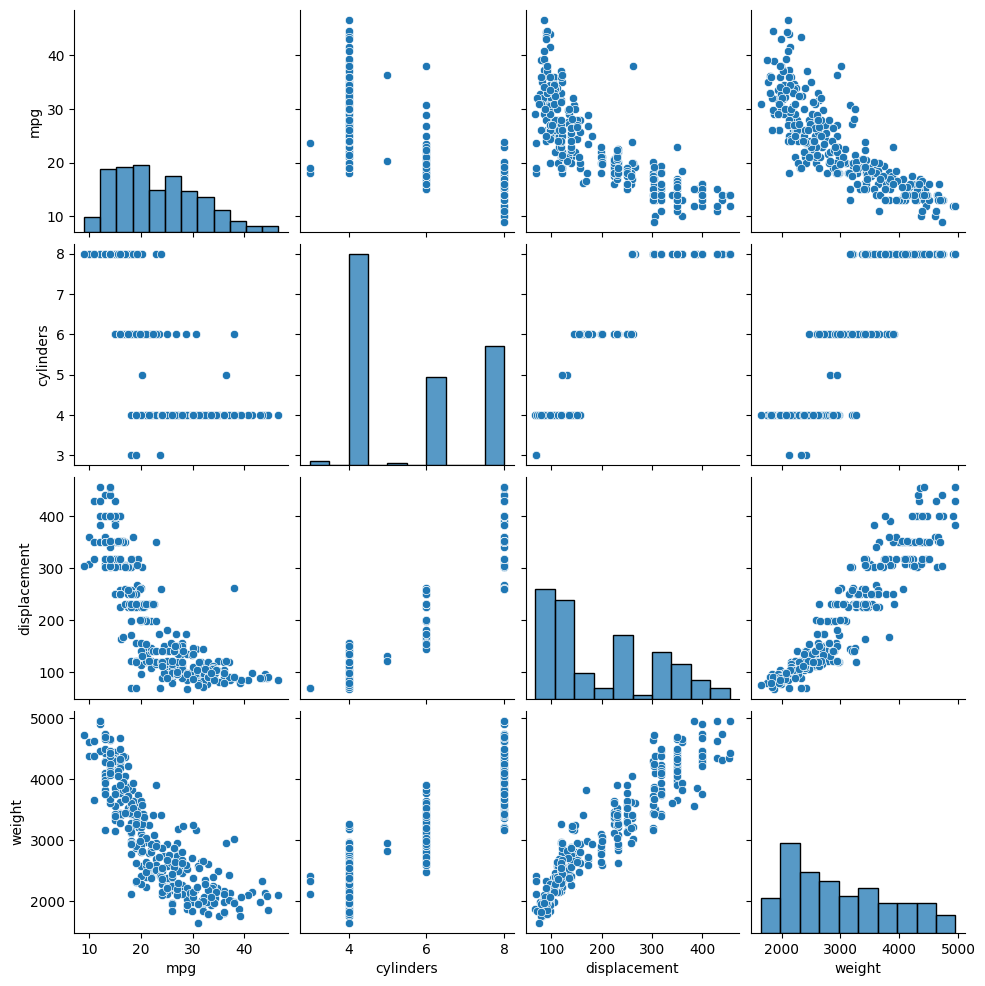

In [22]:
sns.pairplot(train_dataset[["mpg","cylinders",
                            "displacement","weight"]])

In [24]:
# 기술 통계
train_stats=train_dataset.describe()
train_stats.pop("mpg")
train_stats

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828,0.624204,0.171975,0.203822
std,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989,0.485101,0.377961,0.403481
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [25]:
# transpose() 행과열을 바꿈
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.00,8.0
displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.00,455.0
horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.00,230.0
weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.75,4955.0
acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.00,24.8
model_year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.00,82.0
usa,314.0,0.624204,0.485101,0.0,0.000,1.0,1.00,1.0
europe,314.0,0.171975,0.377961,0.0,0.000,0.0,0.00,1.0
japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.00,1.0


In [26]:
# 레이블 - 예측할려는 칼럼
# 특성 - 다른 칼럼
# 특성과 레이블을 분리
train_labels=train_dataset.pop("mpg")
test_labels=test_dataset.pop("mpg")

In [28]:
train_dataset.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,4,79.0,58.0,1825,18.6,77,0.0,1.0,0.0
281,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
342,4,135.0,84.0,2385,12.9,81,1.0,0.0,0.0
238,4,98.0,83.0,2075,15.9,77,1.0,0.0,0.0
209,4,120.0,88.0,3270,21.9,76,0.0,1.0,0.0


In [29]:
train_labels.tail()

218    36.0
281    19.8
342    30.0
238    33.5
209    19.0
Name: mpg, dtype: float64

In [30]:
#데이터 정규화
def norm(x):
    return (x-train_stats["mean"])/train_stats["std"]
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [31]:
normed_train_data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,-0.885743,-1.115990,-1.210280,-1.374460,1.101875,0.295249,-1.286751,2.190772,-0.505158
281,0.270695,0.020140,-0.529091,-0.018328,0.959199,0.837404,0.774676,-0.455006,-0.505158
342,-0.885743,-0.590178,-0.554320,-0.722586,-0.931255,1.379558,0.774676,-0.455006,-0.505158
238,-0.885743,-0.937590,-0.579549,-1.083445,0.138814,0.295249,0.774676,-0.455006,-0.505158
209,-0.885743,-0.731021,-0.453403,0.307609,2.278950,0.024172,-1.286751,2.190772,-0.505158


In [33]:
len(train_dataset.keys())

9

In [34]:
# 모델 만들기
def build_model():
    model=keras.Sequential([
        layers.Dense(64,input_shape=[len(train_dataset.keys())],
                    activation="relu"),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse",optimizer=optimizer,
                  metrics=["mae","mse"])
    return model

In [35]:
# 모델 확인
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 훈련
# 1000번->에포크
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0:print("")
        print('.',end="")
EPOCHS=1000
model=build_model()
history=model.fit(
    normed_train_data,train_labels,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [38]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.651845,1.044494,2.651845,5.206548,1.809277,5.206548,995
996,2.571589,1.015761,2.571589,5.097633,1.783574,5.097633,996
997,2.455656,0.991790,2.455656,5.273938,1.830658,5.273938,997
998,2.394404,1.000362,2.394404,5.046096,1.707208,5.046096,998
999,2.540113,1.030150,2.540113,5.180104,1.809943,5.180104,999


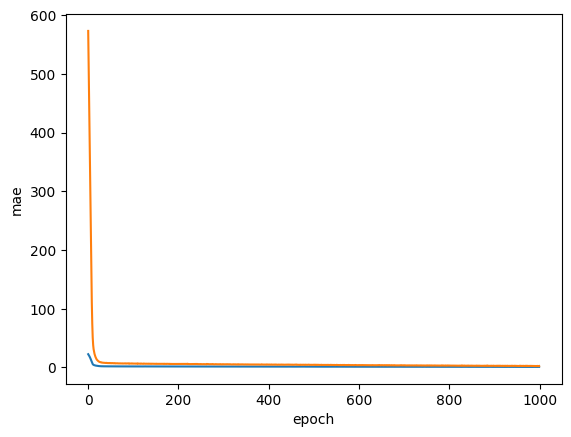

In [39]:
# 학습 1000 가성비
# 학습을 진행하면서 오차율을 시각화
def sns_hist(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    sns.lineplot(data=hist,x="epoch",y="mae")
    sns.lineplot(data=hist,x="epoch",y="mse")
sns_hist(history)

In [45]:
# model.fit 수정해서 검증 점수가 향상되지 않으면 자동으로
# 훈련을 멈추도록 하는 것만 수정
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss",
                                         patience=10)
history=model.fit(
    normed_train_data,train_labels,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[PrintDot(),early_stop]
)


....................................................................................................
......................................

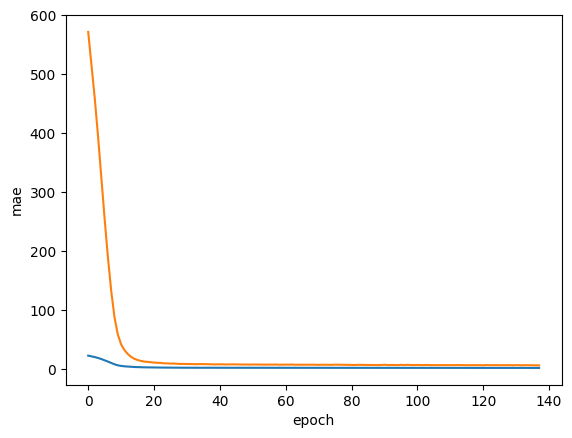

In [46]:
sns_hist(history)

In [49]:
#성능 평가
loss,mae,mse=model.evaluate(normed_test_data,
                            test_labels,verbose=2)
print("테스트 세트의 평균 절대 오차: {:.2f} MPG".format(mae))

3/3 - 0s - loss: 7.1607 - mae: 1.9762 - mse: 7.1607 - 17ms/epoch - 6ms/step
테스트 세트의 평균 절대 오차: 1.98 MPG


In [51]:
#시각화해서 평가
#예측
test_predictions=model.predict(normed_test_data).flatten()
test_predictions

3/3 [==============================] - 0s 998us/step


array([14.990722, 15.891041, 20.92562 , 22.70739 , 17.442392, 13.279466,
       26.575243, 23.685308, 24.279715, 28.52551 , 29.187698, 25.606203,
       26.275694, 14.412576, 23.267252, 14.285066, 14.523062, 13.695949,
       18.365072, 13.738098, 13.395383, 18.886118, 19.73038 , 22.296873,
       14.450575, 27.023344, 17.127844, 15.600388, 15.963061, 21.89437 ,
       21.36751 , 18.08725 , 16.214563, 15.029796, 18.74608 , 18.14036 ,
       19.208925, 29.82769 , 18.686455, 15.896119, 30.514751, 25.87299 ,
       29.159573, 23.267305, 33.66444 , 19.623518, 21.484121, 20.658697,
       18.611052, 17.14398 , 29.35303 , 21.898037, 22.276325, 17.877502,
       31.371681, 32.536854, 23.798769, 24.465458, 28.028639, 35.187206,
       32.239292, 23.135374, 32.467697, 31.655008, 33.406967, 21.58723 ,
       36.001358, 35.598476, 30.467505, 24.661335, 24.39739 , 24.372095,
       35.794216, 34.621   , 28.896847, 32.79585 , 34.86255 , 28.120447],
      dtype=float32)

<AxesSubplot:xlabel='mpg'>

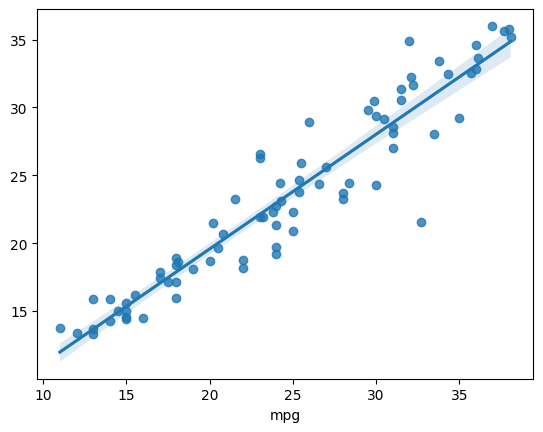

In [52]:
sns.regplot(x=test_labels,y=test_predictions)

<AxesSubplot:xlabel='mpg'>

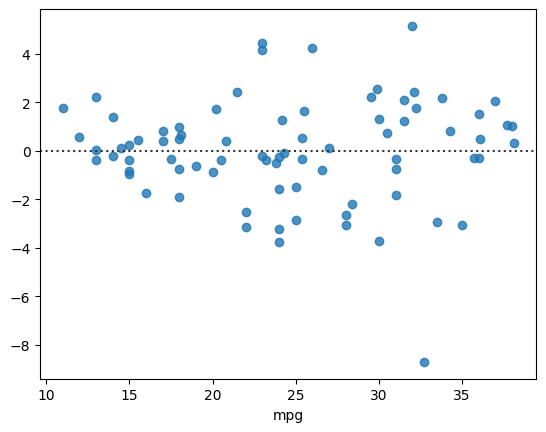

In [53]:
sns.residplot(x=test_labels,y=test_predictions)

In [54]:
#오차 분포
error=test_predictions-test_labels
error.tail()

381   -1.379002
388    2.896847
391   -3.204151
395    2.862549
397   -2.879553
Name: mpg, dtype: float64

<AxesSubplot:>

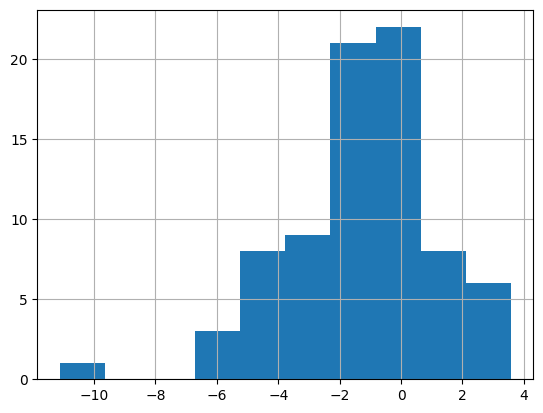

In [55]:
error.hist()